In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1].loc[3:]

# **PLOT 1**

In [13]:
countries.columns = ["country", "1990", "2005", "2017", "fos%", "fos%change", "per_area", "per_capita", "lucf_inc", "lucf_excl"]
countries.reset_index(inplace = True,drop = True)
countries

,country,1990,2005,2017,fos%,fos%change,per_area,per_capita,lucf_inc,lucf_excl
0,Afghanistan,2.55,1.06,11.42,0.03%,348.6%,18.00,0.30,7.59,7.44
1,Albania,6.58,4.20,5.03,0.01%,-23.7%,175.00,1.70,5.32,5.56
2,Algeria,65.68,98.20,159.93,0.43%,143.5%,67.00,3.90,151.87,151.67
3,Angola,5.85,15.97,30.88,0.08%,427.7%,25.00,1.00,62.93,27.34
4,Anguilla,0.01,0.01,0.03,0.00%,366.7%,308.00,1.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
204,Vietnam,20.18,99.23,218.73,0.59%,983.8%,660.00,2.30,245.36,257.86
205,Western Sahara,0.14,0.23,0.28,0.00%,91.7%,1.00,0.50,NaN,NaN
206,Yemen,6.89,21.77,12.50,0.03%,81.5%,24.00,0.40,9.31,9.31
207,Zambia,2.96,2.46,4.97,0.01%,68.1%,7.00,0.30,40.47,7.74


In [4]:
fos17_sorted = countries.sort_values(by=["2017"], ascending= False)
fos17_sorted.reset_index(inplace = True,drop = True)
final = fos17_sorted.loc[0:4,["country","1990", "2005", "2017"]]

# **FIGURE 1**

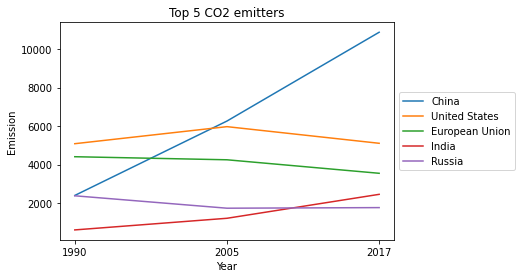

In [5]:
fig, ax = plt.subplots()

years = final.columns[1:]

for index, row in final.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Top 5 CO2 emitters")
plt.xlabel("Year")
plt.ylabel("Emission")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# **PLOT 2**

# **FIGURE 2**

In [20]:
changers = countries
changers["change"] = (changers.loc[:,"2017"] / changers.loc[:,"1990"]) * 100

changers_sorted = changers.sort_values(by=["change"], ascending= False)
head_change = changers_sorted.head(3)
head_tail_change = head_change.append(changers_sorted.tail(3))

head_tail_change.reset_index(inplace = True,drop = True)

top_bott_change = head_tail_change.loc[:, ["country","1990", "2005", "2017"]]

# changers
# changers_sorted
# head_tail_change
top_bott_change

,country,1990,2005,2017
0,Greenland,0.00,0.63,0.52
1,Cambodia,0.41,2.69,10.56
2,Equatorial Guinea,0.10,3.37,2.47
3,Ukraine,783.21,354.43,205.72
4,Moldova,31.96,8.14,8.26
5,Armenia,20.70,4.54,4.83


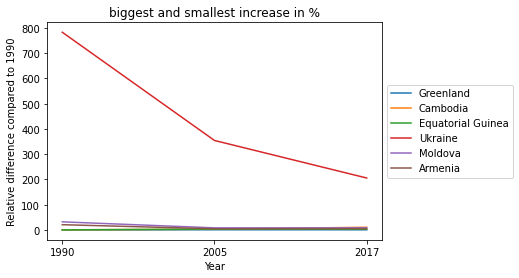

In [11]:
fig, ax = plt.subplots()

years = top_bott_change.columns[1:]

for index, row in top_bott_change.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("biggest and smallest increase in %")
plt.xlabel("Year")
plt.ylabel("Relative difference compared to 1990")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# **FIGURE 3**

In [7]:
large_countries = countries[countries["2017"] > 5]
large_countries["change"] = (large_countries.loc[:,"2017"] / large_countries.loc[:,"1990"]) * 100

change_sorted = large_countries.sort_values(by=["change"], ascending= False)
head = change_sorted.head(3)
head_tail = head.append(change_sorted.tail(3))

head_tail.reset_index(inplace = True,drop = True)

top_bott = head_tail.loc[:, ["country","1990", "2005", "2017"]]
top_bott.columns = ["country","fos90", "fos05", "fos17"]

top_bott["1990"] = top_bott.loc[:,"fos90"] / top_bott.loc[:,"fos90"] * 100
top_bott["2005"] = top_bott.loc[:,"fos05"] / top_bott.loc[:,"fos90"] * 100
top_bott["2017"] = top_bott.loc[:,"fos17"] / top_bott.loc[:,"fos90"] * 100

perc = top_bott.loc[:, ["country","1990", "2005", "2017"]]

# countries
# large_countries
# change_sorted
# head_tail
# top_bott
perc

,country,1990,2005,2017
0,Cambodia,100.00,659.95,2594.59
1,Benin,100.00,684.10,1710.12
2,Vietnam,100.00,491.68,1083.78
3,North Korea,100.00,60.57,28.75
4,Ukraine,100.00,45.25,26.27
5,Moldova,100.00,25.47,25.86


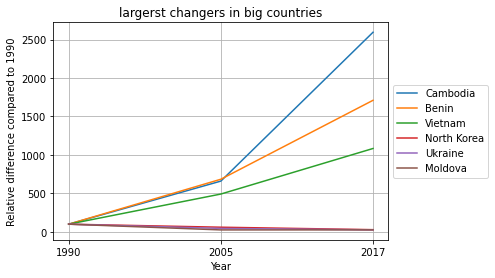

In [21]:
fig, ax = plt.subplots()

years = perc.columns[1:]

for index, row in perc.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("largerst changers in big countries")
plt.xlabel("Year")
plt.ylabel("Relative difference compared to 1990")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)

plt.show()